In [3]:
import pandas as pd

# Load the dataset
file_path = '/Users/zanealderfer/Downloads/fake.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Basic text preprocessing function
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (if needed)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the text column (assuming the text column is named 'text')
data['cleaned_text'] = data['text'].apply(preprocess_text)
print(data.head())

title      0
text       0
subject    0
date       0
dtype: int64


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zanealderfer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zanealderfer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date                                       cleaned_text  
0  December 31, 2017  donald trump wish americans happy new year lea...  
1  December 31, 2017  house intelligence committee chairman devin nu...  
2  December 30, 2017  friday revealed former milwaukee s

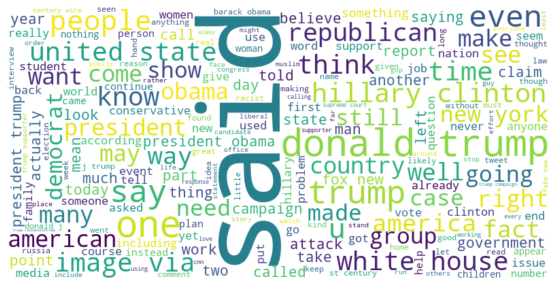

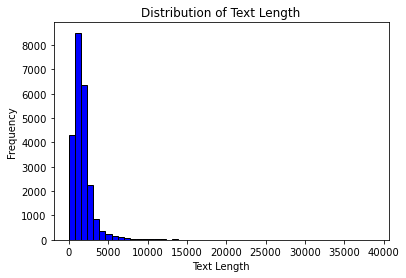

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Distribution of text length
data['text_length'] = data['cleaned_text'].apply(len)
plt.hist(data['text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names())
print(tfidf_df.head())

   abc  able  abortion  absolutely  access  according  account  accused  \
0  0.0   0.0       0.0         0.0     0.0   0.000000      0.0      0.0   
1  0.0   0.0       0.0         0.0     0.0   0.138467      0.0      0.0   
2  0.0   0.0       0.0         0.0     0.0   0.000000      0.0      0.0   
3  0.0   0.0       0.0         0.0     0.0   0.000000      0.0      0.0   
4  0.0   0.0       0.0         0.0     0.0   0.000000      0.0      0.0   

   across  act  ...     would     wrong  wrote      year   yearold     years  \
0     0.0  0.0  ...  0.044074  0.045161    0.0  0.466119  0.046936  0.061934   
1     0.0  0.0  ...  0.000000  0.000000    0.0  0.000000  0.000000  0.000000   
2     0.0  0.0  ...  0.000000  0.000000    0.0  0.000000  0.047752  0.000000   
3     0.0  0.0  ...  0.095425  0.000000    0.0  0.048058  0.000000  0.000000   
4     0.0  0.0  ...  0.000000  0.000000    0.0  0.000000  0.000000  0.000000   

   yes       yet      york     young  
0  0.0  0.000000  0.000000  0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zanealderfer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        cleaned_text  \
0  donald trump wish americans happy new year lea...   
1  house intelligence committee chairman devin nu...   
2  friday revealed former milwaukee sheriff david...   
3  christmas day donald trump announced would bac...   
4  pope francis used annual christmas day message...   

                                    sentiment_scores  
0  {'neg': 0.215, 'neu': 0.505, 'pos': 0.28, 'com...  
1  {'neg': 0.105, 'neu': 0.766, 'pos': 0.129, 'co...  
2  {'neg': 0.225, 'neu': 0.68, 'pos': 0.095, 'com...  
3  {'neg': 0.079, 'neu': 0.844, 'pos': 0.077, 'co...  
4  {'neg': 0.143, 'neu': 0.669, 'pos': 0.188, 'co...  


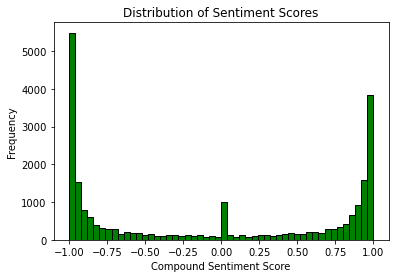

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER data (if needed)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sid.polarity_scores(text)

# Apply sentiment analysis
data['sentiment_scores'] = data['cleaned_text'].apply(get_sentiment_scores)
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

# Display sentiment scores
print(data[['cleaned_text', 'sentiment_scores']].head())

# Plot sentiment distribution
plt.hist(data['compound_score'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_features)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
trump us wire obama president century state clinton st would
Topic 1:
trump donald president hillary clinton people said like one obama
Topic 2:
trump fbi clinton russia russian comey investigation intelligence hillary news
Topic 3:
muslim said court us refugees students federal obama immigration school
Topic 4:
police black people gun said video officers one white lives


In [8]:
import pandas as pd

# Load the dataset
file_path = '/Users/zanealderfer/Downloads/true.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [9]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Basic text preprocessing function
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (if needed)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the text column (assuming the text column is named 'text')
data['cleaned_text'] = data['text'].apply(preprocess_text)
print(data.head())

title      0
text       0
subject    0
date       0
dtype: int64


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zanealderfer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zanealderfer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date                                       cleaned_text  
0  December 31, 2017   washington reuters head conservative republica...  
1  December 29, 2017   washington reuters transgender people allowed ...  
2  December 31, 2

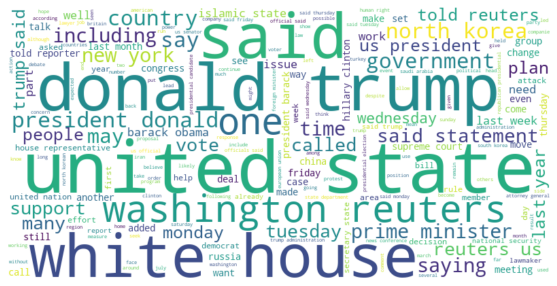

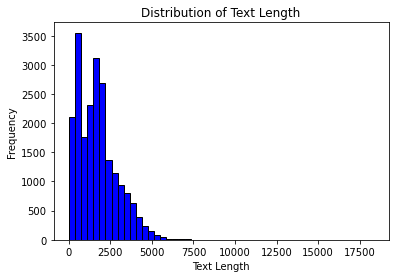

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Distribution of text length
data['text_length'] = data['cleaned_text'].apply(len)
plt.hist(data['text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names())
print(tfidf_df.head())

   able  access  according  account  accusations   accused  across  act  \
0   0.0     0.0   0.000000      0.0          0.0  0.000000     0.0  0.0   
1   0.0     0.0   0.000000      0.0          0.0  0.000000     0.0  0.0   
2   0.0     0.0   0.000000      0.0          0.0  0.000000     0.0  0.0   
3   0.0     0.0   0.049842      0.0          0.0  0.063356     0.0  0.0   
4   0.0     0.0   0.132221      0.0          0.0  0.000000     0.0  0.0   

     action   actions  ...     would     wrote   xi      year  yearold  \
0  0.038232  0.000000  ...  0.053461  0.000000  0.0  0.000000      0.0   
1  0.000000  0.000000  ...  0.134211  0.000000  0.0  0.000000      0.0   
2  0.000000  0.000000  ...  0.024420  0.000000  0.0  0.033234      0.0   
3  0.000000  0.075866  ...  0.030114  0.000000  0.0  0.040984      0.0   
4  0.000000  0.000000  ...  0.015977  0.037225  0.0  0.108722      0.0   

     years  yemen       yet      york     young  
0  0.07902    0.0  0.039023  0.000000  0.048201  
1  0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zanealderfer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        cleaned_text  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                    sentiment_scores  
0  {'neg': 0.067, 'neu': 0.8, 'pos': 0.133, 'comp...  
1  {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...  
2  {'neg': 0.074, 'neu': 0.833, 'pos': 0.093, 'co...  
3  {'neg': 0.099, 'neu': 0.805, 'pos': 0.096, 'co...  
4  {'neg': 0.085, 'neu': 0.783, 'pos': 0.132, 'co...  


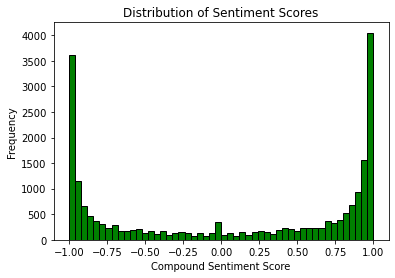

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER data (if needed)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sid.polarity_scores(text)

# Apply sentiment analysis
data['sentiment_scores'] = data['cleaned_text'].apply(get_sentiment_scores)
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

# Display sentiment scores
print(data[['cleaned_text', 'sentiment_scores']].head())

# Plot sentiment distribution
plt.hist(data['compound_score'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_features)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf_vectorizer.get_feature_names(), 10)

Topic 0:
said party court government eu police minister european would britain
Topic 1:
china trump korea us said north united nuclear states president
Topic 2:
said military syria islamic state forces syrian turkey russia russian
Topic 3:
trump said clinton republican campaign presidential us election trumps house
Topic 4:
said tax house senate us trump would bill republican republicans
